# House Price Prediction

## The objective of this project is to predict the house prices in the King County, Washington from the transaction details of houses sold previously.

### Exploratory Data Analysis

#### Hypothesis: Top factors affecting price of house

1. sqft_living
2. sqft_lot
3. number of bedrooms
4. grade
5. condition


In [75]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# reading the file

df=pd.read_csv(r"https://raw.githubusercontent.com/AkhilaShanbhag/House_Price_Prediction/master/kc_house_train_data.csv")

In [76]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [77]:
# dropping columns sqft_living15 and sqft_lot15 as they are not needed

df=df.drop("sqft_living15",axis=1)
df=df.drop("sqft_lot15",axis=1)

In [24]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


In [27]:
# Shape of training data
df.shape

(9761, 19)

In [11]:
# checking for null values and data type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [12]:
# Checking for number of unique values in each variables
    
print('Shape of dataframe: ', df.shape)
for column in df:
    unique_values = np.unique(df[column])
    unique_no = len(unique_values)
    print("The number of unique values for variable {} is {} ".format(column,unique_no ))
    
    

Shape of dataframe:  (9761, 19)
The number of unique values for variable id is 9720 
The number of unique values for variable date is 357 
The number of unique values for variable price is 2533 
The number of unique values for variable bedrooms is 13 
The number of unique values for variable bathrooms is 28 
The number of unique values for variable sqft_living is 730 
The number of unique values for variable sqft_lot is 5581 
The number of unique values for variable floors is 6 
The number of unique values for variable waterfront is 2 
The number of unique values for variable view is 5 
The number of unique values for variable condition is 5 
The number of unique values for variable grade is 11 
The number of unique values for variable sqft_above is 665 
The number of unique values for variable sqft_basement is 251 
The number of unique values for variable yr_built is 116 
The number of unique values for variable yr_renovated is 65 
The number of unique values for variable zipcode is 7

#### As the data has no null values and the number of unique values in column id is less than 9761 (total number of rows), it is evident the dataset has data of houses which were sold more than once.

### Uivariate Analysis

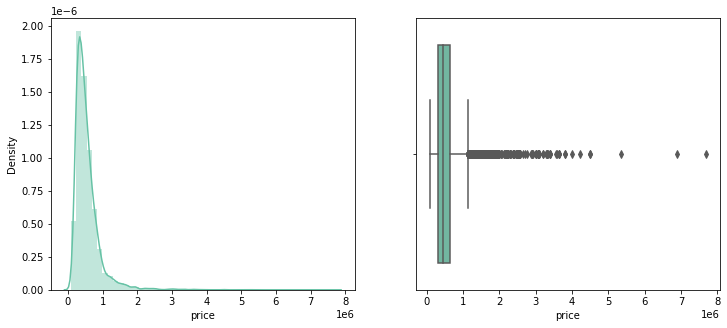

In [20]:
# target variable is price

plt.figure(figsize = (12,5))
sns.set_palette("Set2")

plt.subplot(1,2,1)
sns.distplot(df['price'])

plt.subplot(1,2,2)
sns.boxplot(df['price'])

plt.show()

In [32]:
# minimum, average and maximum price of the house

print("Minimum price of the house sold: ",np.min(df.price))
print("Average price of the house sold: ",np.mean(df.price))
print("Maximum price of the house sold: ",np.max(df.price))

Minimum price of the house sold:  80000.0
Average price of the house sold:  542734.9516442987
Maximum price of the house sold:  7700000.0


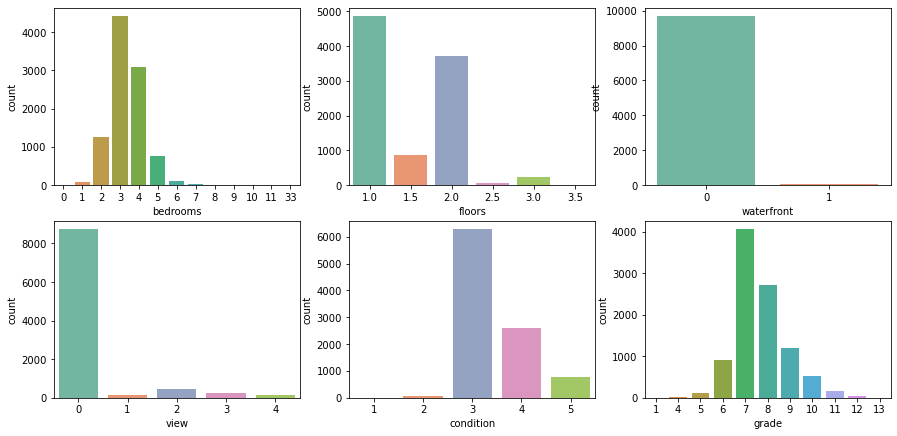

In [440]:
# count plot of categorical variables

plt.figure(figsize = (15,15))
sns.set_palette("Set2")

plt.subplot(4,3,1)
sns.countplot(df.bedrooms)

plt.subplot(4,3,2)
sns.countplot(df.floors)

plt.subplot(4,3,3)
sns.countplot(df.waterfront)

plt.subplot(4,3,4)
sns.countplot(df.view)

plt.subplot(4,3,5)
sns.countplot(df.condition)

plt.subplot(4,3,6)
sns.countplot(df.grade)

plt.show()

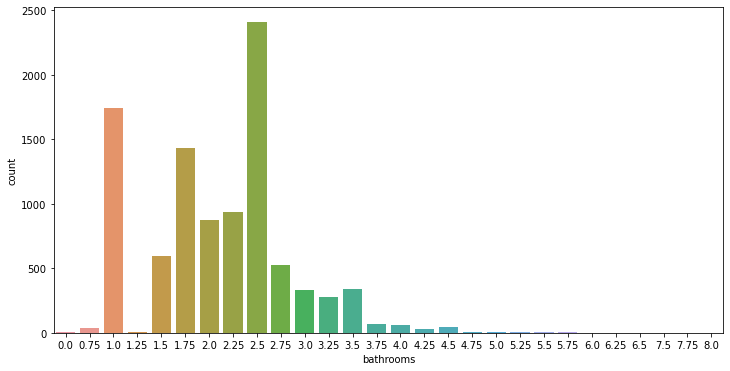

In [441]:
# ploting countplot to find the number of bathroom the house have

plt.figure(figsize = (12,6))
sns.set_palette("Set2")

sns.countplot(df.bathrooms)

plt.show()

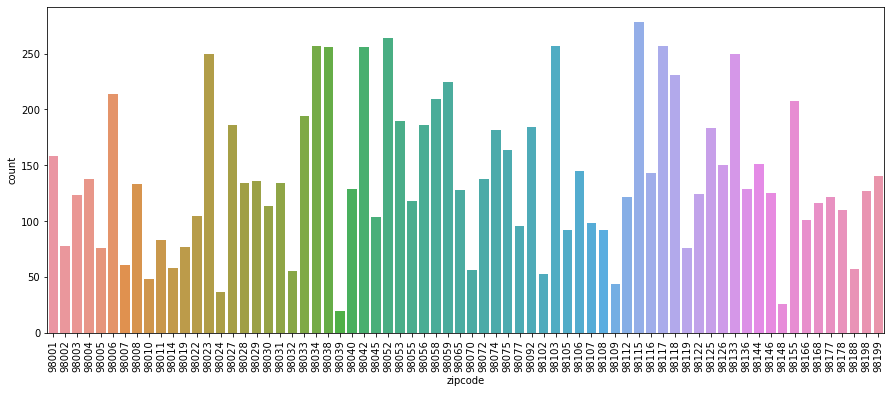

In [442]:
# understanding the houses sold by zipcodes

plt.figure(figsize = (15,6))
sns.set_palette("Set2")

sns.countplot(df.zipcode)
plt.xticks(rotation=90)

plt.show()

### Findings:

Out of the houses that were sold in 2014 and 2015, most houses:

- have 3 bedrooms
- have 1 floor, followed by 2 floors
- don't have any waterbody in the front
- have no good views
- have been ranked 3 for condition which is average
- have average graded of 7 and 8
- have 2.5 bathrooms followed by 1 and 1.75 bathrooms

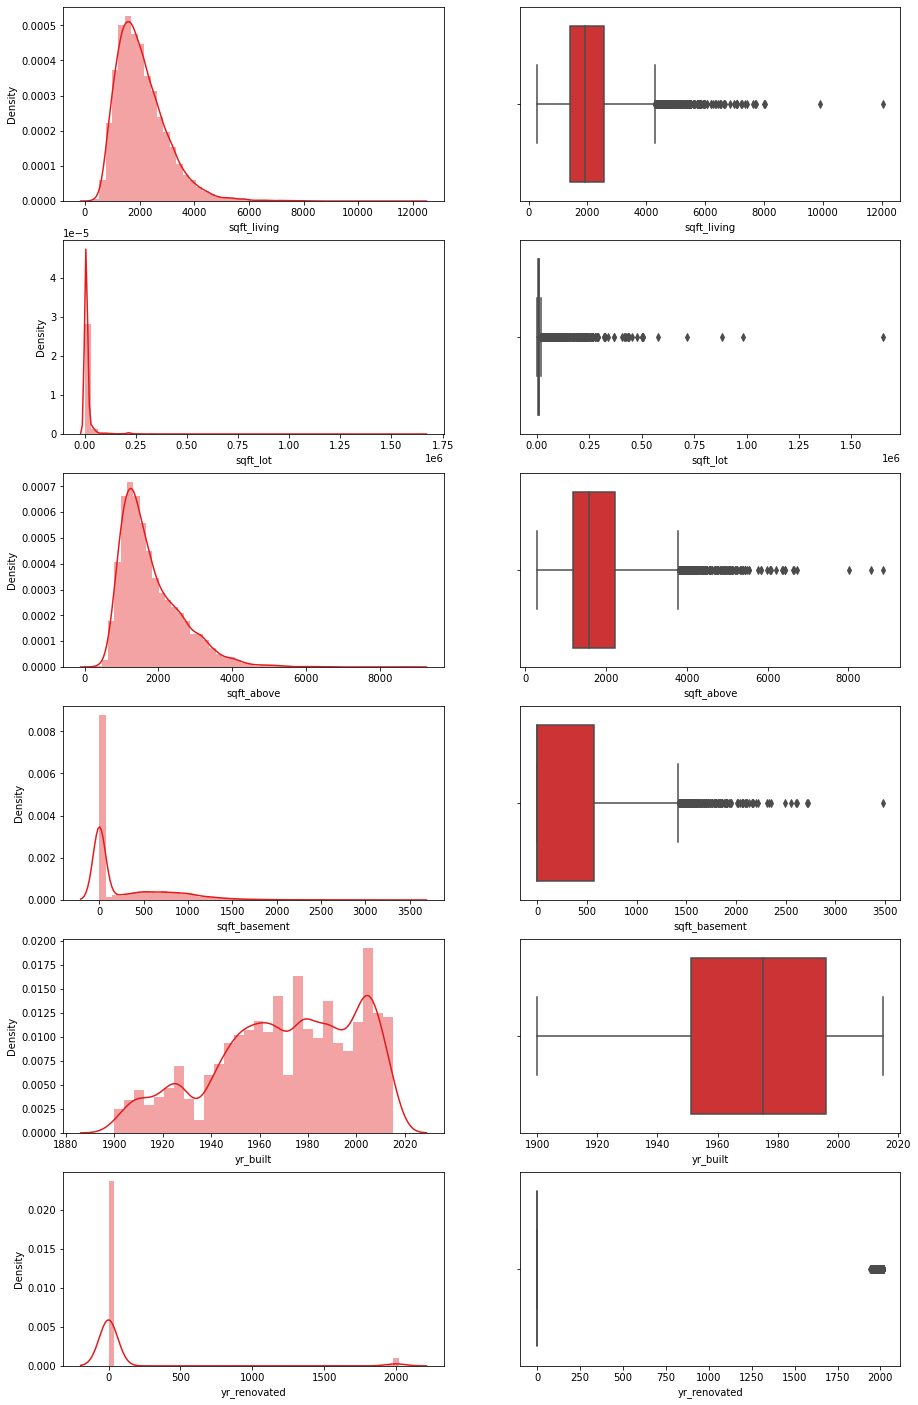

In [41]:
# histogram of non-categorial variables

plt.figure(figsize = (15,25))
sns.set_palette("Set1")


plt.subplot(6,2,1)
sns.distplot(df.sqft_living)

plt.subplot(6,2,2)
sns.boxplot(df.sqft_living)

plt.subplot(6,2,3)
sns.distplot(df.sqft_lot)

plt.subplot(6,2,4)
sns.boxplot(df.sqft_lot)

plt.subplot(6,2,5)
sns.distplot(df.sqft_above)

plt.subplot(6,2,6)
sns.boxplot(df.sqft_above)

plt.subplot(6,2,7)
sns.distplot(df.sqft_basement)

plt.subplot(6,2,8)
sns.boxplot(df.sqft_basement)

plt.subplot(6,2,9)
sns.distplot(df.yr_built)

plt.subplot(6,2,10)
sns.boxplot(df.yr_built)

plt.subplot(6,2,11)
sns.distplot(df.yr_renovated)

plt.subplot(6,2,12)
sns.boxplot(df.yr_renovated)

plt.show()

### Findings:

Out of the houses that were sold in 2014 and 2015, most houses:

- have living area between 1500 sqft to 2500 sqft
- have no basements
- were built after 1960
- most houses were never renovated

### Bivarite analysis

Text(0, 0.5, 'Price')

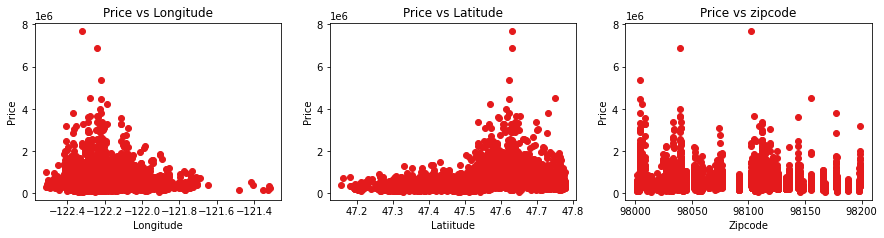

In [42]:
# checking if price has was affected by location of the house

plt.figure(figsize = (15,15))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.long,df.price)
plt.title("Price vs Longitude")
plt.xlabel("Longitude")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.lat,df.price)
plt.title("Price vs Latitude")
plt.xlabel("Latiitude")
plt.ylabel("Price")

plt.subplot(4,3,3)
plt.scatter(df.zipcode,df.price)
plt.title("Price vs zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")

Text(0, 0.5, 'Latitude')

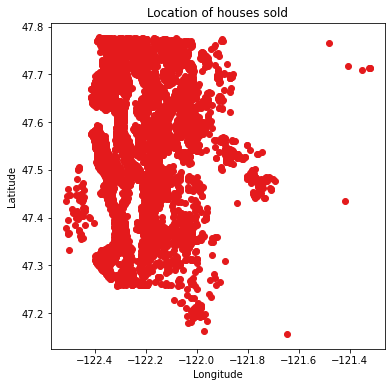

In [445]:
# to understnd the spread of houses that were sold along latitude and longitude

plt.figure(figsize = (6,6))
sns.set_palette("Set1")
plt.scatter(df.long,df.lat)
plt.title("Location of houses sold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Findings:

- Most houses that were sold are located in the same or nearby location.
- ZIpcode doesn't seem to have much affect of price.
- Prices seem to be higher for certain geographical cordinates (lat and long).

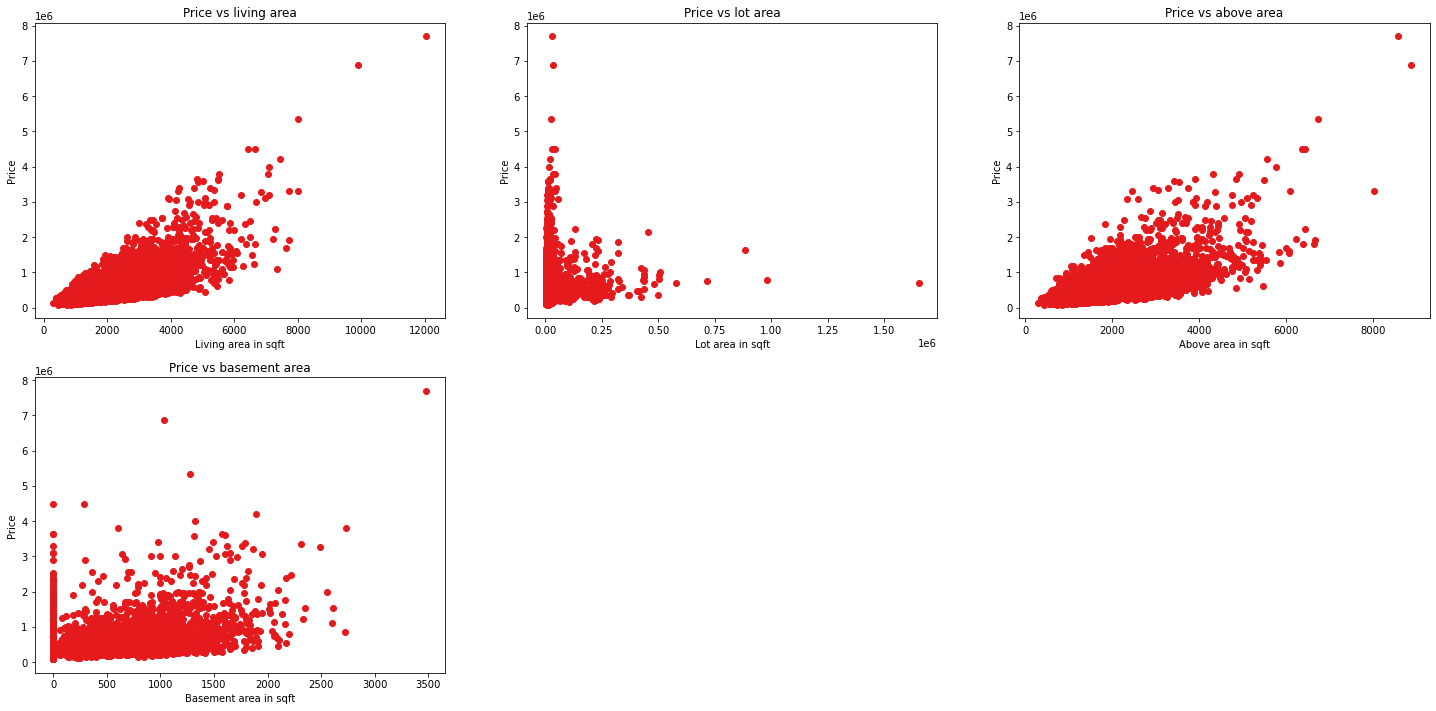

In [46]:
# to understand if price is affected by the area of the house and lot

plt.figure(figsize = (25,25))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.sqft_living,df.price)
plt.title("Price vs living area")
plt.xlabel("Living area in sqft")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.sqft_lot,df.price)
plt.title("Price vs lot area")
plt.xlabel("Lot area in sqft")
plt.ylabel("Price")

plt.subplot(4,3,3)
plt.scatter(df.sqft_above,df.price)
plt.title("Price vs above area")
plt.xlabel("Above area in sqft")
plt.ylabel("Price")

plt.subplot(4,3,4)
plt.scatter(df.sqft_basement,df.price)
plt.title("Price vs basement area")
plt.xlabel("Basement area in sqft")
plt.ylabel("Price")

plt.show()

### Findings:

We can see that the area of the house is affecting price. Price and area in sqft are possitively corelated.
    

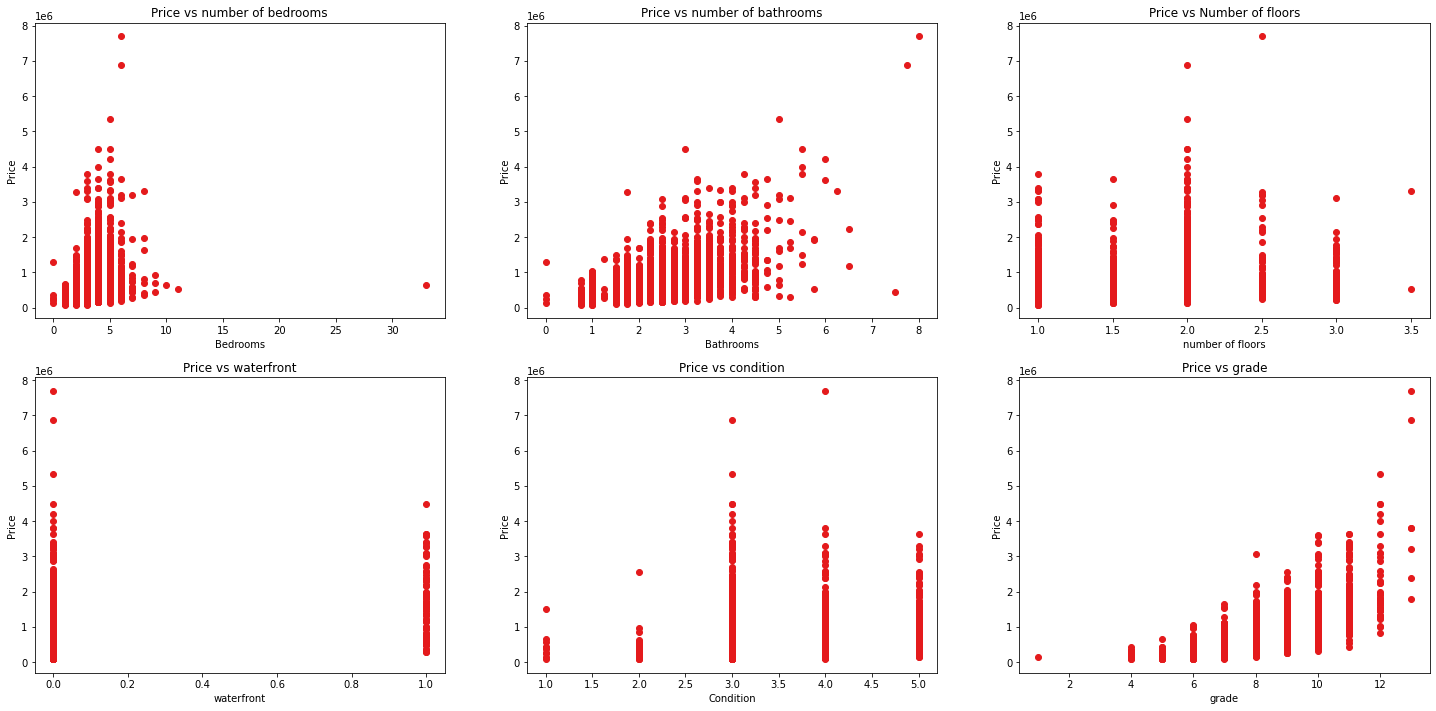

In [47]:
# understanding how other features of the house affect the price

plt.figure(figsize = (25,25))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.bedrooms,df.price)
plt.title("Price vs number of bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.bathrooms,df.price)
plt.title("Price vs number of bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")

plt.subplot(4,3,3)
plt.scatter(df.floors,df.price)
plt.title("Price vs Number of floors")
plt.xlabel("number of floors")
plt.ylabel("Price")

plt.subplot(4,3,4)
plt.scatter(df.waterfront,df.price)
plt.title("Price vs waterfront")
plt.xlabel("waterfront")
plt.ylabel("Price")

plt.subplot(4,3,5)
plt.scatter(df.condition,df.price)
plt.title("Price vs condition")
plt.xlabel("Condition")
plt.ylabel("Price")

plt.subplot(4,3,6)
plt.scatter(df.grade,df.price)
plt.title("Price vs grade")
plt.xlabel("grade")
plt.ylabel("Price")


plt.show()

### Findings:

- We can see that number of bedrooms, bathrooms and grade of the house are possitively corelated to price. As the number of bedrooms and bathroom and grade of the house increases, the price of the house increases.

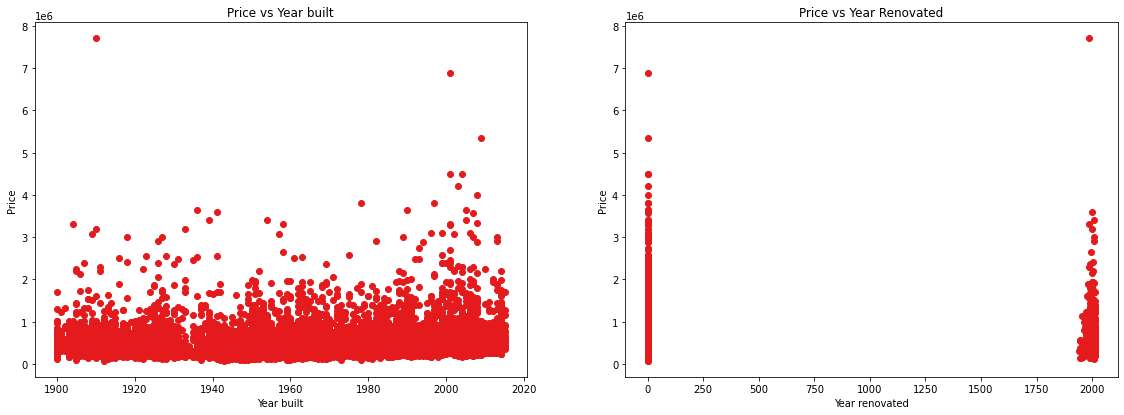

In [448]:
# to understand if year built and renovated year has any affect on the priceof houses

plt.figure(figsize = (30,30))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.yr_built,df.price)
plt.title("Price vs Year built")
plt.xlabel("Year built")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.yr_renovated,df.price)
plt.title("Price vs Year Renovated")
plt.xlabel("Year renovated")
plt.ylabel("Price")

plt.show()

### Findings:

- We can see that year built and year the house was renovated doesn't affect the price much.

### Corelation matrix

In [449]:
corr=df.corr()
corr.style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514


### Overall Infernece:

- From the bivariate analysis, we found the following variables are affecting prices of houses:
   - Living area in sqft
   - Grade of the house
   - Area above in sqft ( attic area)
   - Number of bathrooms
   - number of bedrooms
   

### Experimenting with different models

### Experiment 1:

For this experiment I have selected the features that are highly correlated with price based on the correlation matrix.

- Model 1:
   - Living area in sqft
   - Grade of the house
   - Area above in sqft ( attic area)
   - Number of bathrooms
   - number of bedrooms

In [450]:
# selecting these predictors as these are highly correlated with price based on our earlier analysis

# splitting the dataframe into predictors and target variable

df_m1_X=df[["sqft_living","grade","sqft_above","bathrooms","bedrooms"]]
df_m1_y=df.price


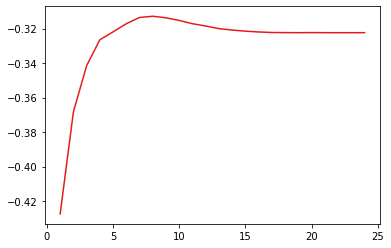

In [451]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent1=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m1_X,df_m1_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent1.append(score.mean())

plt.plot(depth,mae_percent1)

In [452]:
print(mae_percent)
print("\nLeast error: ",np.max(mae_percent))


[-0.4274103024199693, -0.36828917559481267, -0.3414989111311467, -0.32648149242071317, -0.3219000600258598, -0.31717060676643316, -0.31352777470246845, -0.31285410563842064, -0.31379232788527783, -0.3153067621491631, -0.3171864830613539, -0.31869740789842976, -0.32010301698424537, -0.32087074027183843, -0.3215377735218041, -0.3219590019759119, -0.32235161595854434, -0.32227928474415635, -0.3224296756014816, -0.32238873346942293, -0.32240050357288347, -0.32242692556917063, -0.3224366223826417, -0.3222752520900193]

Least error:  -0.31285410563842064


#### Best depth for this model would be 8 as it has the least error percentage

#### We found that, by using using these features, we get an error rate of atleast 31%. We will continuing to build models with other feature combinations to see we if we could build a model with lesser error rate.

### Experiment 3:

For this experiment we have selected the features that are we thought would affect the price as our initial guess.

- Model 2:
   - Living area in sqft
   - Lot area in sqft
   - Grade of the house
   - Condition of the house
   - number of bedrooms

In [453]:
# selecting these predictors as these predictors were our initial guess

# selecting dataframes of predictrs and target

df_m2_X=df[["sqft_living","condition","sqft_lot","grade","bedrooms"]]
df_m2_y=df.price


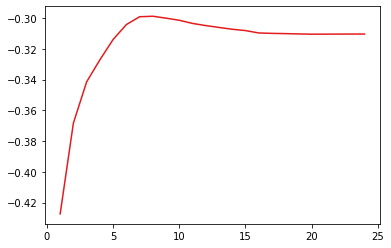

In [454]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent2=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m2_X,df_m2_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent2.append(score.mean())

plt.plot(depth,mae_percent2)

In [455]:
print(mae_percent2)
print("\nLeast error: ",np.max(mae_percent2))


[-0.4274103024199693, -0.36828917559481267, -0.3414989111311467, -0.32718315219976335, -0.31395414535061883, -0.3042591697568214, -0.2991450692454882, -0.2988188513527829, -0.30006245590584313, -0.30143685633365236, -0.30348966063559707, -0.3048953829546521, -0.30610475763140027, -0.30727750456015557, -0.3081478002298277, -0.3096881095753097, -0.3099631351369931, -0.3101164615344792, -0.31032570226758494, -0.3104920287434879, -0.3104691797458209, -0.31042315280484056, -0.31040135978882033, -0.310405102857834]

Least error:  -0.2988188513527829


#### Best depth for this model would be 8 as it has the least error percentage

#### We found that, by using using these features, we get an error rate of atleast 29.9%. We will continuing to build models with other feature combinations to see we if we could build a model with lesser error rate.

### Experiment 3:

For this experiment we have selected the features that are least correlated with price based on the correlation matrix.

- Model 3:
   - Floor
   - Condition of the house
   - Lot area in sqft
   - year it was built
   - year it was renovated

In [456]:
# selecting these predictors as these seem to have least correlation with price

# selecting dataframes of predictrs and target

df_m3_X=df[["yr_renovated","condition","sqft_lot","yr_built","floors"]]
df_m3_y=df.price


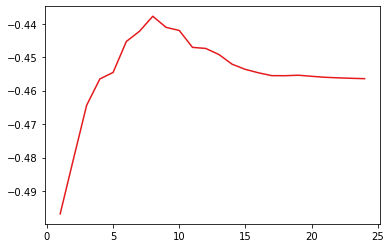

In [457]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent3=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m3_X,df_m3_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent3.append(score.mean())

plt.plot(depth,mae_percent3)

In [458]:
print(mae_percent3)
print("\nLeast error: ",np.max(mae_percent3))

[-0.4968356615948216, -0.48049884654474706, -0.4643827148827614, -0.45649685980124166, -0.4545619850729718, -0.445311389995824, -0.4422365421985145, -0.43776794477088743, -0.44108787020434415, -0.442018402885578, -0.4470706224921699, -0.44738717937168265, -0.44921401113542425, -0.4521181785152103, -0.45365105209101764, -0.4546814716641715, -0.45552233617388593, -0.45553677667606224, -0.4553949171335683, -0.4557140179543143, -0.4560078444609198, -0.4561728476839308, -0.4563099435577677, -0.45642274550076645]

Least error:  -0.43776794477088743


#### Best depth for this model would be 8 as it has the least error percentage

#### We found that, by using using these features, we get an error rate of atleast 43%. We will continuing to build models with other feature combinations to see we if we could build a model with lesser error rate.

### Experiment 4:

For this model, I have selected most of the features.

In [721]:
# selecting features as predictors and target

df_m4_X=df.drop(["id"],axis=1)
df_m4_X=df_m4_X.drop(["date"],axis=1)
df_m4_X=df_m4_X.drop(["price"],axis=1)
df_m4_X=df_m4_X.drop(["yr_renovated"],axis=1)
df_m4_y=df.price

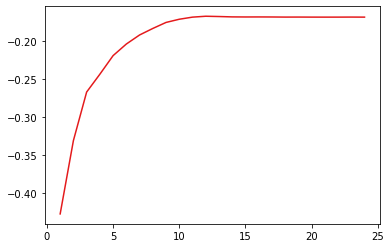

In [723]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent4=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m4_X,df_m4_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent4.append(score.mean())

plt.plot(depth,mae_percent4)
plt.show()

In [724]:
print(mae_percent4)
print("\nLeast error: ",np.max(mae_percent4))

[-0.4274103024199693, -0.3310881097027129, -0.2672800035675123, -0.24383181827650852, -0.21940643448045702, -0.20417428835512647, -0.1922897966776574, -0.18371439678252194, -0.17579998201038355, -0.17160023444000763, -0.1688339351859659, -0.16766300790506422, -0.16803516522409176, -0.1685116806264349, -0.1686230045776837, -0.16857715353418787, -0.16863765753225923, -0.16877363508002957, -0.168740676012942, -0.1688043391126212, -0.16882973113432675, -0.16881630093908814, -0.16875416301433355, -0.16883165125546915]

Least error:  -0.16766300790506422


#### Best depth for this model would be 11 as it has the least error percentage.

#### Model 4 is the best model so far as this has the least error rate when compared to other models that we experimented with earlier.

### Hyperparameter Tuning with original data

In [725]:
# importing libraries to fit decision tree models

from sklearn.tree import DecisionTreeRegressor

from sklearn import tree

### Experiment 5:

For the 4 models that we built earlier, we had set the min_samples_leaf at 10 and tried to get least error by changing the depth of the decision tree. In this experiment, we are trying to get the least error by adjusting both depth and min_samples_leaf together.

### Model 1

In [223]:
# selecting these predictors as these are highly correlated with price based on our earlier analysis

# splitting the dataframe into predictors and target variable

df_m1_X=df[["sqft_living","grade","sqft_above","bathrooms","bedrooms"]]
df_m1_y=df.price



In [228]:
# Importing libraries

from sklearn.model_selection import GridSearchCV

# using GridSearchCV fro cross validation
model1= DecisionTreeRegressor()

# MAE
gs1=GridSearchCV(model1,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs1.fit(df_m1_X,df_m1_y)

print(gs1.best_params_)
print(-gs1.best_score_)
model1_mae=-gs1.best_score_

{'max_depth': 7, 'min_samples_leaf': 20}
155054.77314632048


In [612]:
# MAE percentage

gs1=GridSearchCV(model1,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs1.fit(df_m1_X,df_m1_y)

print(gs1.best_params_)
print(-gs1.best_score_)
model1_mape=-gs1.best_score_

{'max_depth': 9, 'min_samples_leaf': 30}
0.3118347291368528


#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 9 and 30 for this model. IF we would want to improve this model, we have to set the parameters to 9 and 30 instead of 8 and 10 as we did in experiment 1. 

### Model 2

In [230]:
# selecting these predictors as these predictors were our initial guess

# selecting dataframes of predictrs and target

df_m2_X=df[["sqft_living","condition","sqft_lot","grade","bedrooms"]]
df_m2_y=df.price


In [231]:
# cross Validation

# using GridSearchCV fro cross validation
model2= DecisionTreeRegressor()

# MAE
gs2=GridSearchCV(model2,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs2.fit(df_m2_X,df_m2_y)

print(gs2.best_params_)
print(-gs2.best_score_)
model2_mae= -gs2.best_score_

{'max_depth': 7, 'min_samples_leaf': 10}
149430.71011758246


In [613]:
# MAE percentage

gs2=GridSearchCV(model1,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs2.fit(m2_X_scaled,df_m2_y)

print(gs2.best_params_)
print(-gs2.best_score_)
model2_mape= -gs2.best_score_

{'max_depth': 10, 'min_samples_leaf': 20}
0.2982061895928009


#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 10 and 20 for this model. If we would want to improve this model, we have to set the parameters to 10 and 20 instead of 8 and 10 as we did in experiment 2. 

### Model 3

In [233]:
# selecting these predictors as these seem to have least correlation with price

# selecting dataframes of predictrs and target

df_m3_X=df[["yr_renovated","condition","sqft_lot","yr_built","floors"]]
df_m3_y=df.price


In [234]:
# cross Validation

# using GridSearchCV fro cross validation
model3= DecisionTreeRegressor()

# MAE
gs3=GridSearchCV(model3,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs3.fit(df_m3_X,df_m3_y)

print(gs3.best_params_)
print(-gs3.best_score_)
model3_mae= -gs3.best_score_

{'max_depth': 7, 'min_samples_leaf': 40}
205798.46124838773


In [614]:
# MAE percentage
gs3=GridSearchCV(model3,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs3.fit(df_m3_X,df_m3_y)

print(gs3.best_params_)
print(-gs3.best_score_)
model3_mape= -gs3.best_score_

{'max_depth': 8, 'min_samples_leaf': 20}
0.43617472712625965


#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 8 and 20 for this model. If we would want to improve this model, we have to set the parameters to 8 and 20 instead of 8 and 10 as we did in experiment 3. 

### Model 4

Considering all the above predictors 

In [655]:
# selecting features as predictors and target

df_m4_X=df[["bedrooms","bathrooms","sqft_living","sqft_lot","view","grade","condition",
            "sqft_above","sqft_basement","floors","lat","long","yr_built","waterfront","zipcode"]]
df_m4_y=df.price

In [656]:
# using GridSearchCV fro cross validation
model4= DecisionTreeRegressor()

# MAE
gs4=GridSearchCV(model4,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs4.fit(df_m4_X,df_m4_y)

print(gs4.best_params_)
print(-gs4.best_score_)
model4_mae=-gs4.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
93496.89649832365


In [657]:
# MAE
gs4=GridSearchCV(model4,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4.fit(df_m4_X,df_m4_y)

print(gs4.best_params_)
print(-gs4.best_score_)
model4_mape=-gs4.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.16763655417093276


#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 12 and 10 for this model. If we would want to improve this model, we have to set the parameters to 102and 10 instead of 11 and 10 as we did in experiment 4. 

In [658]:
print("MAE of model 1: ",model1_mae)
print("MAE of model 2: ",model2_mae)
print("MAE of model 3: ",model3_mae)
print("MAE of model 4: ",model4_mae)

print("\nMAPE % of model 1: ",model1_mape)
print("MAPE % of model 2: ",model2_mape)
print("MAPE % of model 3: ",model3_mape)
print("MAPE % of model 4: ",model4_mape)

MAE of model 1:  155054.77314632048
MAE of model 2:  149430.71011758246
MAE of model 3:  205798.46124838773
MAE of model 4:  93496.89649832365

MAPE % of model 1:  0.3118347291368528
MAPE % of model 2:  0.2982061895928009
MAPE % of model 3:  0.43617472712625965
MAPE % of model 4:  0.16763655417093276


#### Model 4 which is taking all predictors except year renovated has the lowest error and hence, we can say it is the best model.

### Feature Engineering

Experimenting to see if tranforming the features would help in building a better model.

In [50]:
# making a copy of the data

copy_df=df.copy()

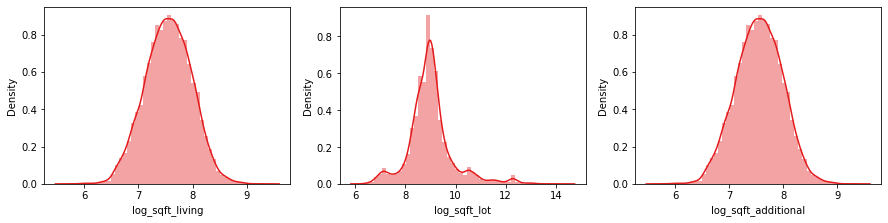

In [51]:
# transforming sqft_living and sqft_lot into log

copy_df[["log_sqft_living"]]=np.log(copy_df[["sqft_living"]])
copy_df[["log_sqft_lot"]]=np.log(copy_df[["sqft_lot"]])

# considering area of attic and basement together as additional sqft and adding it as a new column

copy_df["log_sqft_additional"]=np.log(copy_df["sqft_above"] + copy_df["sqft_basement"])

# plotiing three new columns to understand their distribution
plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
sns.distplot(copy_df.log_sqft_living)


plt.subplot(4,3,2)
sns.distplot(copy_df.log_sqft_lot)

plt.subplot(4,3,3)
sns.distplot(copy_df.log_sqft_additional)

plt.show()

In [52]:
# creating a new feature age of the house using the features date sold and year built

copy_df["age_of_house"]=pd.to_numeric(copy_df['date'].str[:4])-copy_df["yr_built"]

copy_df

# dropping unnecessary features from the copy_df dataframe

copy_df=copy_df.drop(["id","date"],axis=1)
copy_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_sqft_living,log_sqft_lot,log_sqft_additional,age_of_house
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,7.580700,8.517193,7.580700,49
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,1530,2001,0,98053,47.6561,-122.005,8.597851,11.532042,8.597851,13
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,300,1942,0,98115,47.6900,-122.292,7.056175,8.699515,7.056175,72
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,1927,0,98028,47.7558,-122.229,7.265430,9.898525,7.265430,87
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,0,1977,0,98074,47.6127,-122.045,7.222566,9.177817,7.222566,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,...,0,2014,0,98144,47.5699,-122.288,7.306531,7.026427,7.306531,1
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,...,0,2014,0,98056,47.5137,-122.167,7.832014,8.703341,7.832014,0
9758,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,...,910,2009,0,98136,47.5537,-122.398,8.163371,8.881836,8.163371,6
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,6.927558,7.207860,6.927558,5


### Hyperparameter Tuning using data with transformed features

### Experiment 6:

Building a model by replcing the feature sqft_living and sqft_lot in model 4 with log_sqft_living and log_sqft_lot and sqft_above and sqft_basement with log_sqft_additional.

In [731]:
# spliting the transformed data in to predictors and target

df_m4_tf_X=copy_df[["bedrooms","bathrooms","log_sqft_living","log_sqft_lot","view","grade","condition",
            "log_sqft_additional","floors","lat","long","age_of_house","waterfront","zipcode"]]
df_m4_tf_y=copy_df.price


In [728]:
# using GridSearchCV fro cross validation
model4_tf= DecisionTreeRegressor()

# MAPE
gs4_tf=GridSearchCV(model4_tf,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4_tf.fit(df_m4_tf_X,df_m4_tf_y)

print(gs4_tf.best_params_)
print(-gs4_tf.best_score_)
model4_mape_tf=-gs4_tf.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.16813812066701528


### Experiment 8:

Building a model by replcing the feature sqft_living and sqft_lot in model 4 with log_sqft_living and log_sqft_lot.

In [667]:
# spliting the transformed data in to predictors and target

df_m4_tf_X=copy_df[["bedrooms","bathrooms","log_sqft_living","log_sqft_lot","view","grade","condition",
            "sqft_above","sqft_basement","floors","lat","long","age_of_house","waterfront","zipcode"]]
df_m4_tf_y=copy_df.price


In [670]:
# using GridSearchCV fro cross validation
model4_tf= DecisionTreeRegressor()

# MAPE
gs4_tf=GridSearchCV(model4_tf,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4_tf.fit(df_m4_tf_X,df_m4_tf_y)

print(gs4_tf.best_params_)
print(-gs4_tf.best_score_)
model4_mape_tf=-gs4_tf.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.1681862568479362


### Experiment 9:

Building a model by replcing the feature sqft_above and sqft_basement in model 4 with log_sqft_additional.

In [729]:
# spliting the transformed data in to predictors and target

df_m4_tf_X=copy_df[["bedrooms","bathrooms","sqft_living","sqft_lot","view","grade","condition",
            "log_sqft_additional","floors","lat","long","age_of_house","waterfront","zipcode"]]
df_m4_tf_y=copy_df.price


In [730]:
# using GridSearchCV fro cross validation
model4_tf= DecisionTreeRegressor()

# MAPE
gs4_tf=GridSearchCV(model4_tf,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4_tf.fit(df_m4_tf_X,df_m4_tf_y)

print(gs4_tf.best_params_)
print(-gs4_tf.best_score_)
model4_mape_tf=-gs4_tf.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.16816802077423842


#### There is no much difference between models built with original features and transformed features as the change in error is negligible. Hence, we would consider a model without feature transformation to test with test data.

### Experiment: 10

#### Using Random Forest Regressor to select the predictors

Using Random forest regressor and select from model to get the top features that would help in predicting the target.

In [697]:
# importing libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

df_X=df.drop(["price","id","date"],axis=1)
df_y=df.price


In [702]:
# finding the best features set 
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(df_X, df_y)

selected_feat= df_X.columns[(sel.get_support())]
print(selected_feat)

Index(['sqft_living', 'grade', 'lat', 'long'], dtype='object')


In [703]:
df_sel_X=df_X[["sqft_living","grade","lat","long"]]
df_sel_y=df.price

In [706]:
# hyperparameter tuning using the selected features

model_sel= DecisionTreeRegressor()

# MAPE
gs_sel=GridSearchCV(model_sel,param_grid={"max_depth":range(5,20),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs_sel.fit(df_sel_X,df_sel_y)

print(gs_sel.best_params_)
print(-gs_sel.best_score_)


{'max_depth': 13, 'min_samples_leaf': 10}
0.17079839202037586


##### We could see that there is very little difference in the error (MAPE) of the model 4 and experiment 10. SInce model 4 is giving lesser error, we chose that as our final model.

### We are slecting model 4 with depth 12 and minsmaples_leaf 10 as the best model.

### Testing the model with test data

In [5]:
# reading the test data

df_test=pd.read_csv(r"https://raw.githubusercontent.com/AkhilaShanbhag/House_Price_Prediction/master/kc_house_test_data.csv")

In [720]:
# slecting features to be fit the model

df_test_X=df_test[["bedrooms","bathrooms","sqft_living","sqft_lot","view","grade","condition",
            "sqft_above","sqft_basement","floors","lat","long","yr_built","waterfront","zipcode"]]
df_test_y=df_test.price

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,condition,sqft_above,sqft_basement,floors,lat,long,yr_built,waterfront,zipcode
0,3,2.50,1890,6560,0,7,3,1890,0,2.0,47.3684,-122.031,2003,0,98038
1,5,2.00,1810,4850,0,7,3,1810,0,1.5,47.6700,-122.394,1900,0,98107
2,2,1.00,1200,9850,0,7,4,1200,0,1.0,47.3089,-122.210,1921,0,98002
3,4,1.75,2330,5000,0,7,4,1510,820,1.5,47.6823,-122.368,1929,0,98117
4,4,1.00,1220,8075,0,7,2,890,330,1.0,47.3341,-122.282,1969,0,98001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,4,2.50,1980,5020,0,7,3,1980,0,2.0,47.5147,-122.190,2007,0,98056
2213,3,2.50,2198,6222,2,8,3,2198,0,2.0,47.3906,-122.304,2010,0,98198
2214,4,3.50,2850,5577,0,8,3,1950,900,2.0,47.5252,-122.192,2014,0,98056
2215,3,1.75,1140,1201,0,8,3,1140,0,2.0,47.5637,-122.295,2014,0,98108


In [685]:
# testing the model on test dataset

dt=DecisionTreeRegressor(max_depth=12,min_samples_leaf=10)
dt.fit(df_m4_X,df_m4_y)
dt_pred=dt.predict(df_test_X)

mape=np.mean(np.abs((df_test_y-dt_pred)/df_test_y))*100
mape

16.73811353124831

#### The model that we selected gives 16.74% error (MAPE) on test data which is very close to the MAPE value that we got on training dataset. 

#### Plotiing the Decision Tree of our final model on test data.

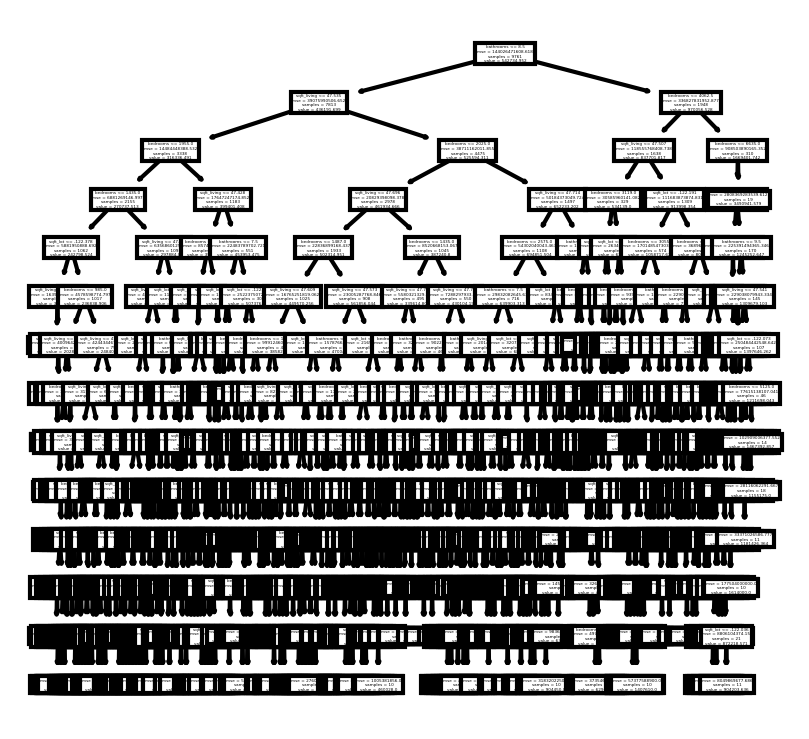

In [732]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(dt, feature_names=list(df_test_X), filled = False)

plt.show()

### Using Linear Regression to predict house price

### Simple Linear Regression

- Fitting simple Linear Regression models with target variable price and writing a for loop to iterate through all the columns in the dataset and finding out the R-square.



In [456]:
# importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats

In [457]:
# getting the data with original and transformed features
data=copy_df
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_sqft_living,log_sqft_lot,log_sqft_additional,age_of_house
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,7.580700,8.517193,7.580700,49
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,1530,2001,0,98053,47.6561,-122.005,8.597851,11.532042,8.597851,13
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,300,1942,0,98115,47.6900,-122.292,7.056175,8.699515,7.056175,72
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,1927,0,98028,47.7558,-122.229,7.265430,9.898525,7.265430,87
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,0,1977,0,98074,47.6127,-122.045,7.222566,9.177817,7.222566,37


In [460]:
#creating a list to store predictor and R-square.
SLR = []   

#initializing the sklearn linear regression model
LR = LinearRegression()  

#writing a for loop for iterating through all columns of dataset except id,date and price.
for i in range(3,np.shape(data.columns)[0]): 
    scores1 = cross_val_score(LR,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='r2')                          
    SLR.append([data.columns[i],scores1.mean()])    #appending the list with predictor and R-square. 

#conevrting the list to pandas dataframe    
SLR_Result = pd.DataFrame(SLR, columns = ["Predictor","R2"])  
SLR_Result 

,Predictor,R2
0,sqft_living,0.489712
1,sqft_lot,0.003879
2,floors,0.061702
3,waterfront,0.067341
4,view,0.152541
5,condition,-0.001943
6,grade,0.438234
7,sqft_above,0.365038
8,sqft_basement,0.096221
9,yr_built,-0.000837


#### If we are using only oe feature, then sqft_living is the best one as it gives the highest r-square value

### Multiple Linear Regression

- Fitting simple Linear Regression models with target variable price and writing a for loop to iterate through all the columns, adding 1 column to the feature list at a time and finding out the R-square, and adjusted R-square value for each iteration.

In [492]:
# creating 2 lists to store r-squared and adj r-squared
MLR=[]


# Initialising the linear regression model
LR=LinearRegression()

# writing a loop to iterate by adding one feature at a time and calculating r-square and adjusted r-squared
for i in range(3,data.shape[1]-4):
    r2=cross_val_score(LR,pd.DataFrame(data.iloc[:,1:i]),pd.DataFrame(data.price),cv=10,scoring='r2')
    adj_r2=1-((1-r2)*(data.shape[0]-1)/(data.shape[0]-(i-1)-1))
    MLR.append([list(data.columns[1:i]),r2.mean(),adj_r2.mean()])
    
# converting the list into dataframe
MLR_result=pd.DataFrame(MLR, columns = ["Predictor","R2","Adj_R2"])
MLR_result           

,Predictor,R2,Adj_R2
0,"[bedrooms, bathrooms]",0.271147,0.270998
1,"[bedrooms, bathrooms, sqft_living]",0.500187,0.500033
2,"[bedrooms, bathrooms, sqft_living, sqft_lot]",0.500728,0.500523
3,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.500598,0.500342
4,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.539028,0.538745
5,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.556837,0.556519
6,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.562873,0.562515
7,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.598112,0.597741
8,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.598102,0.597690
9,"[bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.598102,0.597649


#### From the above dataframe, we can see that using all the features would give us the best results as it has the highest R-suare and adjusted r-square values.

### Experiment 1:

### Now let's try building a Linear Regression model starting with sqft_living and adding one feature at a time and see how R-square and adjusted R-square values change. If the adjusted R-square value decrease, then we will remove that feature from our predictors and continue with other features.

In [617]:
# Initialising the linear regression model
LR=LinearRegression()

# adding 1 feature
df=data[["sqft_living","bathrooms"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms'],r2,adj_r2]]
df_result=pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"])
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665


In [618]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033


In [619]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523


In [620]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","floors"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","floors"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342


In [621]:
# Since feature floors is reducing adjusted r2, we will remove that feature and continue adding other features

# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932


In [622]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519


In [623]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664


In [624]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758


In [625]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944


In [626]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","sqft_basement"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","sqft_basement"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


#### Since feature sqft_basement is reducing adjusted r2, we will remove that feature and continue adding other features

In [627]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


In [628]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","yr_renovated"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","yr_renovated"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


#### Since feature yr_renovated is reducing adjusted r2, we will remove that feature and continue adding other features

In [629]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","zipcode"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","zipcode"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


#### Since feature zipcode is reducing adjusted r2, we will remove that feature and continue adding other features

In [630]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


In [631]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


### Using the original fetaures combination, the best r2 that we could get is 0.6879. Let's try adding the log transformed feature of sqft_living.

In [632]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


### The best r2 that we could get so far is 0.7176. Let's try adding the log transformed feature of sqft_lot.

In [633]:
# adding 1 more feature
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living","log_sqft_lot"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living","log_sqft_lot"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


### The best r2 that we could get so far is 0.7208. Let's try adding the log transformed feature of summation of sqft_above and sqft_basement.

In [634]:
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living","log_sqft_lot","log_sqft_additional"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living","log_sqft_lot","log_sqft_additional"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


#### We are ignoring the new feature as the adjusted r2 decreased.

#### Let's add the new feature age_of house which is calculated using the yr_built feature.

In [635]:
df=data[["sqft_living","bathrooms","bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living","log_sqft_lot","age_of_house"]]

r2=cross_val_score(LR,pd.DataFrame(df),pd.DataFrame(data.price),cv=10,scoring='r2')
r2=r2.mean()
adj_r2=1-((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

list1=[[["sqft_living",'bathrooms',"bedrooms","sqft_lot","waterfront","view","condition","grade","sqft_above","yr_built","lat","long","log_sqft_living","log_sqft_lot","age_of_house"],r2,adj_r2]]
df_result=df_result.append(pd.DataFrame(list1,columns=["Predcitors","R2","Adj_R2"]),ignore_index=True)
df_result

,Predcitors,R2,Adj_R2
0,"[sqft_living, bathrooms]",0.489769,0.489665
1,"[sqft_living, bathrooms, bedrooms]",0.500187,0.500033
2,"[sqft_living, bathrooms, bedrooms, sqft_lot]",0.500728,0.500523
3,"[sqft_living, bathrooms, bedrooms, sqft_lot, f...",0.500598,0.500342
4,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.539168,0.538932
5,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.556792,0.556519
6,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.561978,0.561664
7,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598088,0.597758
8,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597944
9,"[sqft_living, bathrooms, bedrooms, sqft_lot, w...",0.598314,0.597902


### The model that we could come up with so far is the on with 16 features. The intercept and coefficients of fetaures would be as below:

In [643]:
reg=LR.fit(df,data.price)
print("Y-intercept: ",reg.intercept_)
print("Coefficeints: ",reg.coef_)

Y-intercept:  -79778853.2095006
Coefficeints:  [ 3.92729877e+02  5.35022418e+04 -6.79145998e+03  3.17663644e-01
  6.41464435e+05  4.47059999e+04  3.81547640e+04  1.11424207e+05
  2.58027977e+01  2.70203141e+04  5.25573589e+05 -2.73571779e+04
 -5.62144992e+05 -3.03857660e+04  2.95897638e+04]


#### Looking for Multicollinearity

Normality assumption requires variables to be normally distributed for concluding some sort of statistical significance. It also requires that the calculated error values follow a normal distribution to produce unbiased estimates with the minimum variance which will be checked after regression.

However, this assumption is not mandatory for regression if you don't want to do any hypothesis testing. OLS works fine for non-normal data distributions in the context of prediction.

(21.5, -0.5)

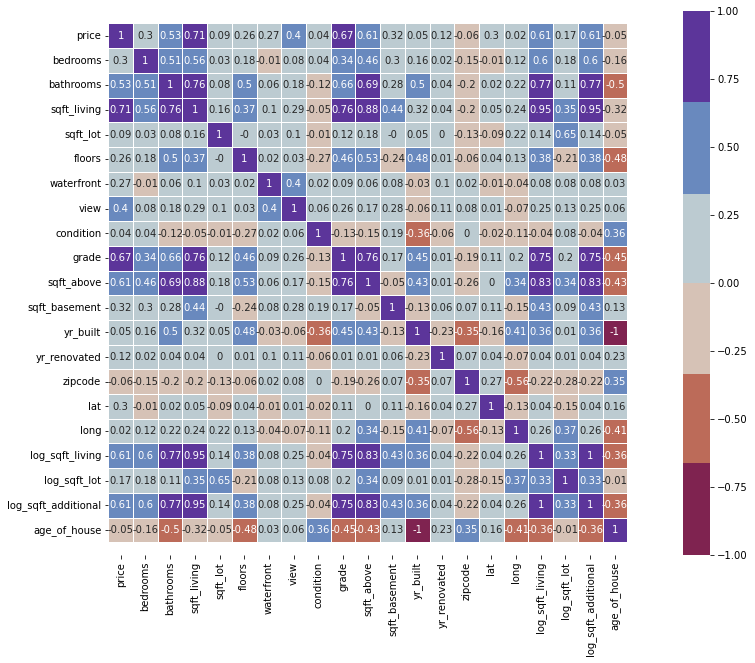

In [149]:
#Heatmap of all correlation coefficients

plt.figure(figsize=(20,10))
ax= sns.heatmap(round(data.corr(),2), annot=True, cmap=sns.color_palette('twilight_shifted_r'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- Age of house and yr_built has high correlation. I will keep the variable age of house and drop yr_built.
- I will drop the variable log_sqft_additional as it has high correlation with multiple variables.
- I will drop the variable sqft_above as it has high correlation with multiple variables.
- I will drop log_sqft_lot and log_sqft_living as these look problamatic.

In [154]:
# dropping the variables

data=data.drop(["age_of_house","log_sqft_additional","sqft_above","log_sqft_lot","log_sqft_living"],axis=1)

In [250]:
# Other correlation to consider

abs(data.drop("price",axis=1).corr()) > 0.8

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


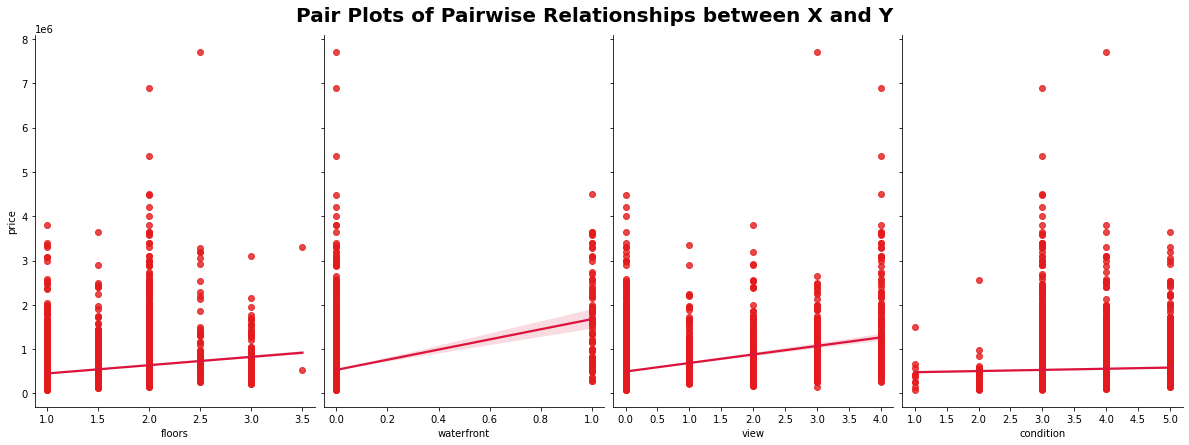

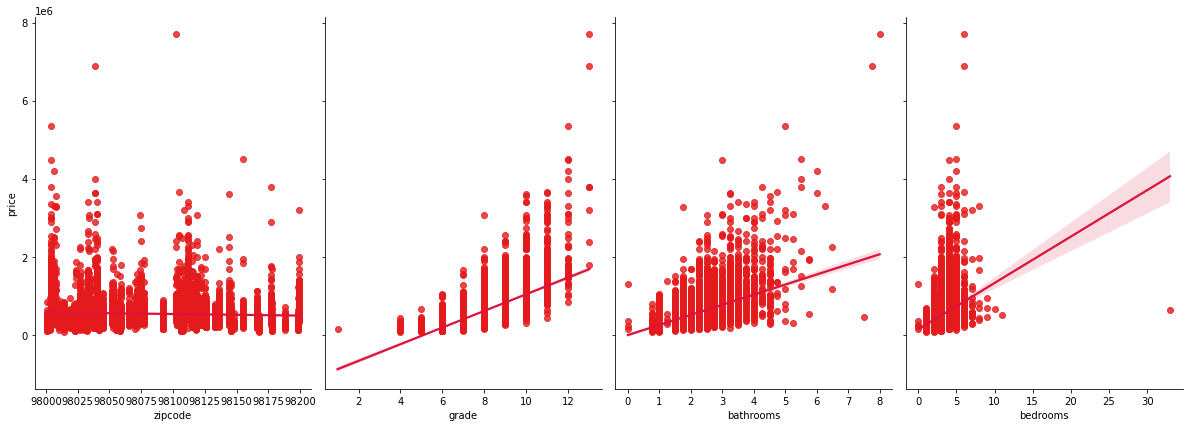

In [159]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)
#Floors, waterfront, view, condition, zipcode, and grade - categorical variables
#Bathrooms and bedrooms are also be categorical, but have some outlier

sns.pairplot(x_vars=['floors', 'waterfront', 'view', 'condition'], 
             y_vars='price', data=data, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['zipcode', 'grade', 'bathrooms', 'bedrooms'], 
             y_vars='price', data=data, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

Text(0.5, 1.02, 'Pair Plots of Pairwise Relationships between X and Y')

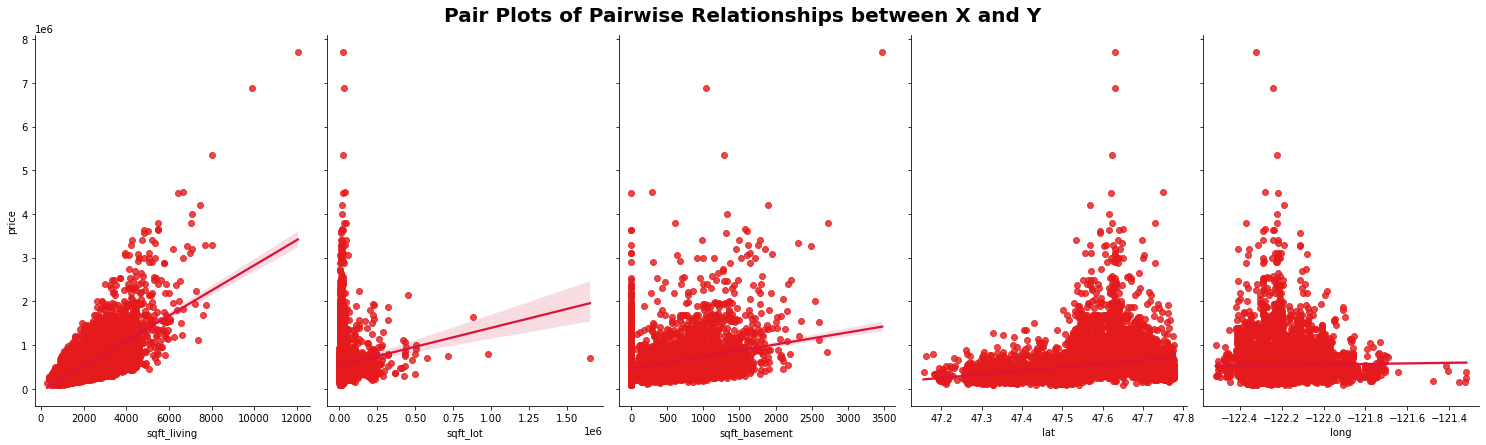

In [161]:
#Price, sqft_living, sqft_lot, sqft_basement, long,lat

sns.pairplot(x_vars=['sqft_living',  'sqft_lot','sqft_basement','lat','long'],
             y_vars='price', data=data, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

### Let's see if using dummy variables would help with improving the model.

### Encoding Categorical Variables

In [298]:
# splitting the dataset into predictors and target

data_y=data[["price"]]
data_x=data.drop("price",axis=1)

In [299]:
bedrooms_dummies = pd.get_dummies(data_x['bedrooms'], prefix = 'bed', drop_first = True)
bathrooms_dummies = pd.get_dummies(data_x['bathrooms'], prefix = 'bath', drop_first = True)
floors_dummies = pd.get_dummies(data_x['floors'], prefix = 'floor', drop_first = True)
view_dummies = pd.get_dummies(data_x['view'], prefix = 'view', drop_first = True)
waterfront_dummies = pd.get_dummies(data_x['waterfront'], prefix = 'water', drop_first = True)
condition_dummies = pd.get_dummies(data_x['condition'], prefix = 'cond', drop_first = True)
yr_renovated_dummies = pd.get_dummies(data_x['yr_renovated'], prefix = 'reno', drop_first = True)
zipcode_dummies = pd.get_dummies(data_x['zipcode'], prefix = 'zip', drop_first = True)
grade_dummies = pd.get_dummies(data_x['grade'], prefix = 'grade', drop_first = True)

In [187]:
# adding dummy variables to the dataframe

data_x = pd.concat([data_x, bedrooms_dummies, bathrooms_dummies, floors_dummies, view_dummies, waterfront_dummies, condition_dummies, yr_renovated_dummies, zipcode_dummies, grade_dummies], axis = 1)


In [188]:
# dropping original variables for which dummies are created
data_x=data_x.drop(["bedrooms","bathrooms","floors","view","waterfront","condition","yr_renovated","zipcode","grade"],axis=1)
data_x

,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,bed_1,bed_2,bed_3,bed_4,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1960,5000,910,1965,47.5208,-122.393,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5420,101930,1530,2001,47.6561,-122.005,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1160,6000,300,1942,47.6900,-122.292,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1430,19901,0,1927,47.7558,-122.229,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1370,9680,0,1977,47.6127,-122.045,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,1490,1126,0,2014,47.5699,-122.288,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9757,2520,6023,0,2014,47.5137,-122.167,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9758,3510,7200,910,2009,47.5537,-122.398,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9759,1020,1350,0,2009,47.5944,-122.299,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Experiment 2:

Fitting a linear regression model for predictors:
- sqft_living
- bedrooms_dummies
- view_dummies
- grade_dummies


In [225]:
# creating a dataset to fit a LP model
data1=pd.concat([data_y["price"],data_x["sqft_living"],bedrooms_dummies,view_dummies,grade_dummies],axis=1)
data1.head()

,price,sqft_living,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,604000.0,1960,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1225000.0,5420,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,468000.0,1160,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,310000.0,1430,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,400000.0,1370,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [227]:
# fitting a LR model and checking the summary

outcome = 'price'
predictors = data1.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model1 = ols(formula=formula, data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     640.0
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:03:37   Log-Likelihood:            -1.3426e+05
No. Observations:                9761   AIC:                         2.686e+05
Df Residuals:                    9733   BIC:                         2.688e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.473e+04   2.28e+05      0.415      0.678   -3.52e+05    5.42e+05
sqft_living   163.0093      4.834     33.720      0.000     153.533     172.485
bed_1        2.072e+05   1.07e+05      1.935      0.053   -2707.255    4.17e+05
bed_2        2.127e+05   1.05e+05      2.027      0.043    6976.307    4.18e+05
bed_3        1.456e+05   1.05e+05      1.389      0.165   -5.99e+04    3.51e+05
bed_4          1.2e+05   1.05e+05      1.143      0.253   -8.57e+04    3.26e+05
bed_5        1.512e+05   1.05e+05      1.436      0.151   -5.51e+04    3.57e+05
bed_6        1.641e+05   1.07e+05      1.532      0.126   -4.59e+04    3.74e+05
bed_7        1.158e+05   1.19e+05      0.975      0.330   -1.17e+05    3.49e+05
bed_8        4.211e+05   1.36e+05      3.099      0.002    1.55e+05    6.87e+05
bed_9        1.521e+05   1.69e+05      0.902      0.367   -1.78e+05    4.83e+05
bed_10       9.224e+04   2.51e+05      0.367      0.714      -4e+05    5.85e+05
bed_11       6.168e+04   2.51e+05      0.246      0.806   -4.31e+05    5.54e+05
bed_33       4.066e+05   2.51e+05      1.620      0.105   -8.55e+04    8.99e+05
view_1       1.579e+05   1.83e+04      8.613      0.000    1.22e+05    1.94e+05
view_2       9.077e+04   1.12e+04      8.132      0.000    6.89e+04    1.13e+05
view_3       1.539e+05   1.51e+04     10.164      0.000    1.24e+05    1.84e+05
view_4       5.712e+05   1.89e+04     30.219      0.000    5.34e+05    6.08e+05
grade_4     -1.857e+05   2.52e+05     -0.736      0.462    -6.8e+05    3.09e+05
grade_5     -2.261e+05   2.52e+05     -0.897      0.370    -7.2e+05    2.68e+05
grade_6     -1.662e+05   2.51e+05     -0.662      0.508   -6.59e+05    3.26e+05
grade_7     -1.254e+05   2.51e+05     -0.499      0.617   -6.18e+05    3.67e+05
grade_8     -7.175e+04   2.51e+05     -0.286      0.775   -5.64e+05    4.21e+05
grade_9      4.176e+04   2.51e+05      0.166      0.868   -4.51e+05    5.34e+05
grade_10     2.099e+05   2.52e+05      0.834      0.404   -2.83e+05    7.03e+05
grade_11     4.872e+05   2.52e+05      1.932      0.053   -7163.858    9.82e+05
grade_12     9.227e+05   2.53e+05      3.643      0.000    4.26e+05    1.42e+06
grade_13     2.539e+06   2.67e+05      9.496      0.000    2.01e+06    3.06e+06
==============================================================================
Omnibus:                     4896.405   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90681.221
Skew:                           1.970   Prob(JB):                         0.00
Kurtosis:                      17.403   Cond. No.                     8.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is l

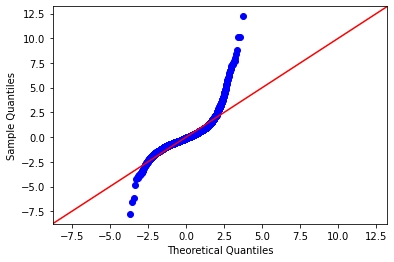

In [232]:
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### Summary for model 2:
- R-squared = 0.64
- Adjusted R-squared=0.639
- Sqft_living and dummy variables for view has 0 p-values. I will exclude these variables in my next model.

### Experiment 3:

Fitting a linear regression model for predictors:
- sqft_basement
- bedrooms_dummies
- zipcode_dummies
- grade_dummies

In [247]:
# creating a dataset to fit a LP model
data2=pd.concat([data_y["price"],grade_dummies,zipcode_dummies,data_x["sqft_basement"],bedrooms_dummies],axis=1)


# fitting a LR model and checking the summary

outcome = 'price'
predictors = data2.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model2 = ols(formula=formula, data=data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     300.8
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:19:38   Log-Likelihood:            -1.3265e+05
No. Observations:                9761   AIC:                         2.655e+05
Df Residuals:                    9668   BIC:                         2.662e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.666e+04   1.97e+05     -0.490      0.624   -4.83e+05     2.9e+05
grade_4        7.674e+04   2.17e+05      0.354      0.724   -3.49e+05    5.02e+05
grade_5        4.782e+04   2.17e+05      0.220      0.826   -3.78e+05    4.73e+05
grade_6        8.409e+04   2.16e+05      0.389      0.698    -3.4e+05    5.08e+05
grade_7        1.148e+05   2.16e+05      0.531      0.596   -3.09e+05    5.39e+05
grade_8        2.171e+05   2.16e+05      1.004      0.316   -2.07e+05    6.41e+05
grade_9        3.998e+05   2.16e+05      1.848      0.065   -2.43e+04    8.24e+05
grade_10       6.416e+05   2.16e+05      2.964      0.003    2.17e+05    1.07e+06
grade_11       1.027e+06   2.17e+05      4.737      0.000    6.02e+05    1.45e+06
grade_12       1.602e+06   2.17e+05      7.372      0.000    1.18e+06    2.03e+06
grade_13       3.367e+06   2.29e+05     14.723      0.000    2.92e+06    3.82e+06
zip_98002      4047.7564   2.69e+04      0.150      0.881   -4.87e+04    5.68e+04
zip_98003     -2.447e+04   2.34e+04     -1.047      0.295   -7.03e+04    2.13e+04
zip_98004      7.865e+05   2.29e+04     34.339      0.000    7.42e+05    8.31e+05
zip_98005      2.802e+05   2.72e+04     10.293      0.000    2.27e+05    3.34e+05
zip_98006      2.764e+05   2.07e+04     13.358      0.000    2.36e+05    3.17e+05
zip_98007      2.175e+05   2.93e+04      7.416      0.000     1.6e+05    2.75e+05
zip_98008      3.015e+05   2.29e+04     13.167      0.000    2.57e+05    3.46e+05
zip_98010      7.788e+04    3.2e+04      2.432      0.015    1.51e+04    1.41e+05
zip_98011      1.138e+05   2.64e+04      4.318      0.000    6.21e+04    1.65e+05
zip_98014      1.291e+05   2.99e+04      4.316      0.000    7.05e+04    1.88e+05
zip_98019      1.142e+05    2.7e+04      4.225      0.000    6.12e+04    1.67e+05
zip_98022      6.031e+04   2.45e+04      2.465      0.014    1.23e+04    1.08e+05
zip_98023     -5.103e+04   1.98e+04     -2.582      0.010   -8.98e+04   -1.23e+04
zip_98024      2.387e+05   3.59e+04      6.642      0.000    1.68e+05    3.09e+05
zip_98027       1.49e+05   2.12e+04      7.046      0.000    1.08e+05    1.91e+05
zip_98028      1.268e+05   2.28e+04      5.556      0.000    8.21e+04    1.72e+05
zip_98029      1.973e+05   2.29e+04      8.631      0.000    1.52e+05    2.42e+05
zip_98030      -433.3721   2.39e+04     -0.018      0.986   -4.72e+04    4.63e+04
zip_98031      1.043e+04   2.28e+04      0.457      0.647   -3.43e+04    5.51e+04
zip_98032     -2.404e+04   3.04e+04     -0.790      0.429   -8.37e+04    3.56e+04
zip_98033      3.522e+05   2.09e+04     16.887      0.000    3.11e+05    3.93e+05
zip_98034       1.94e+05   1.96e+04      9.874      0.000    1.55e+05    2.32e+05
zip_98038      5.934e+04   1.97e+04      3.020      0.003    2.08e+04    9.79e+04
zip_98039      1.353e+06   4.65e+04     29.108   

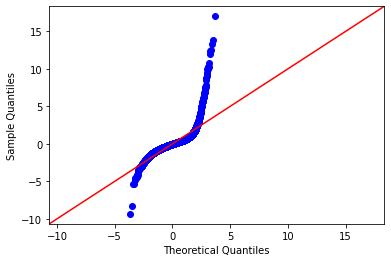

In [248]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### Summary for model 3:
- R-squared = 0.742
- Adjusted R-squared=0.739


### Experiment 4:

Fitting a linear regression model for predictors:
- grade_dummies
- zipcode_dummies
- waterfront_dummies
- view_dummies
- bedrooms_dummies
- sqft_living
- sqft_basement


In [293]:
# creating a dataset to fit a LP model
data3=pd.concat([data_y["price"],zipcode_dummies,waterfront_dummies,view_dummies,bedrooms_dummies,data_x["sqft_living"],data_x["sqft_basement"]],axis=1)
data3["grade_13"]=data_x["grade_13"]

# fitting a LR model and checking the summary

outcome = 'price'
predictors = data3.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model3 = ols(formula=formula, data=data3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     469.4
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:13:59   Log-Likelihood:            -1.3109e+05
No. Observations:                9761   AIC:                         2.624e+05
Df Residuals:                    9671   BIC:                         2.630e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.042e+05   6.92e+04     -1.505      0.132    -2.4e+05    3.15e+04
zip_98002      7046.4293   2.29e+04      0.308      0.758   -3.79e+04    5.19e+04
zip_98003     -1.568e+04   1.99e+04     -0.788      0.431   -5.47e+04    2.33e+04
zip_98004      8.573e+05   1.94e+04     44.081      0.000    8.19e+05    8.95e+05
zip_98005      3.496e+05   2.31e+04     15.107      0.000    3.04e+05    3.95e+05
zip_98006      3.267e+05   1.75e+04     18.625      0.000    2.92e+05    3.61e+05
zip_98007      2.955e+05    2.5e+04     11.840      0.000    2.47e+05    3.44e+05
zip_98008      2.878e+05   1.95e+04     14.739      0.000     2.5e+05    3.26e+05
zip_98010      5.109e+04   2.73e+04      1.874      0.061   -2343.884    1.05e+05
zip_98011      1.151e+05   2.24e+04      5.131      0.000    7.11e+04    1.59e+05
zip_98014      1.094e+05   2.54e+04      4.304      0.000    5.96e+04    1.59e+05
zip_98019      5.989e+04    2.3e+04      2.601      0.009    1.48e+04    1.05e+05
zip_98022      2.464e+04   2.09e+04      1.180      0.238   -1.63e+04    6.56e+04
zip_98023     -1.391e+04   1.68e+04     -0.828      0.408   -4.69e+04     1.9e+04
zip_98024      1.825e+05   3.03e+04      6.021      0.000    1.23e+05    2.42e+05
zip_98027      1.761e+05    1.8e+04      9.794      0.000    1.41e+05    2.11e+05
zip_98028      1.151e+05   1.94e+04      5.922      0.000     7.7e+04    1.53e+05
zip_98029      2.181e+05   1.94e+04     11.254      0.000     1.8e+05    2.56e+05
zip_98030     -2834.9767   2.03e+04     -0.140      0.889   -4.27e+04     3.7e+04
zip_98031      1.202e+04   1.94e+04      0.619      0.536   -2.61e+04    5.01e+04
zip_98032      2.798e+04   2.59e+04      1.080      0.280   -2.28e+04    7.88e+04
zip_98033      3.764e+05   1.77e+04     21.205      0.000    3.42e+05    4.11e+05
zip_98034      2.139e+05   1.67e+04     12.788      0.000    1.81e+05    2.47e+05
zip_98038      2.095e+04   1.68e+04      1.251      0.211   -1.19e+04    5.38e+04
zip_98039      1.315e+06   3.97e+04     33.173      0.000    1.24e+06    1.39e+06
zip_98040      5.706e+05   1.98e+04     28.772      0.000    5.32e+05    6.09e+05
zip_98042      8650.1525   1.67e+04      0.517      0.605   -2.41e+04    4.14e+04
zip_98045      8.326e+04   2.09e+04      3.985      0.000    4.23e+04    1.24e+05
zip_98052      2.384e+05   1.67e+04     14.303      0.000    2.06e+05    2.71e+05
zip_98053      1.921e+05    1.8e+04     10.680      0.000    1.57e+05    2.27e+05
zip_98055      4.566e+04   2.01e+04      2.268      0.023    6188.941    8.51e+04
zip_98056      9.165e+04   1.79e+04      5.122      0.000    5.66e+04    1.27e+05
zip_98058      4.257e+04   1.74e+04      2.442      0.015    8402.431    7.67e+04
zip_98059      7.174e+04   1.72e+04      4.169      0.000     3.8e+04    1.05e+05
zip_98065      3.995e+04   1.98e+04      2.019   

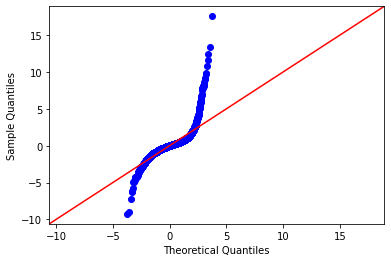

In [262]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### Summary for model 4:
- R-squared = 0.812
- Adjusted R-squared=0.810

#### This is the best model so far, but it is using a lot of dummy variables. 

#### Lets try to build a model with reduced number of dummy variables.


### Experiment 5:

Fitting a linear regression model using all the avialble predictors plus a new predictor which indicates the presence of basement or not



In [331]:
# creating a dummy variable for sqft_basement as this variable has lot of zeros
# zeros in sqft_basement would mean absence of basement, so we would create a dummy variable to check the presense of basement

data["basement"]=np.where(data["sqft_basement"]==0,0,1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,basement
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005,1
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,300,1942,0,98115,47.6900,-122.292,1
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,0,1927,0,98028,47.7558,-122.229,0
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,0,1977,0,98074,47.6127,-122.045,0


In [336]:
# creating a dataset to fit a LP model
data4=data[["price","bedrooms","bathrooms","basement","grade","waterfront","view","sqft_living","floors","zipcode","sqft_lot","condition"]]

# fitting a LR model and checking the summary

outcome = 'price'
predictors = data4.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model4 = ols(formula=formula, data=data4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1400.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:42:11   Log-Likelihood:            -1.3462e+05
No. Observations:                9761   AIC:                         2.693e+05
Df Residuals:                    9749   BIC:                         2.694e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.981e+07   4.74e+06    -10.511      0.000   -5.91e+07   -4.05e+07
bedrooms    -3.118e+04   3138.153     -9.937      0.000   -3.73e+04    -2.5e+04
bathrooms   -9212.0293   5342.993     -1.724      0.085   -1.97e+04    1261.345
basement     1.409e+04   5738.569      2.456      0.014    2844.785    2.53e+04
grade        1.006e+05   3399.222     29.582      0.000    9.39e+04    1.07e+05
waterfront   6.228e+05   2.87e+04     21.708      0.000    5.67e+05    6.79e+05
view         5.477e+04   3544.706     15.452      0.000    4.78e+04    6.17e+04
sqft_living   205.1450      5.284     38.821      0.000     194.787     215.503
floors      -1.036e+04   5966.644     -1.736      0.083   -2.21e+04    1338.546
zipcode       500.5144     48.296     10.363      0.000     405.843     595.186
sqft_lot       -0.2319      0.060     -3.878      0.000      -0.349      -0.115
condition    5.473e+04   3860.355     14.177      0.000    4.72e+04    6.23e+04
==============================================================================
Omnibus:                     7726.653   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           591822.540
Skew:                           3.240   Prob(JB):                         0.00
Kurtosis:                      40.592   Cond. No.                     1.97e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summary for model 5:
- R-squared = 0.612
- Adjusted R-squared=0.612


### Experiment 6:

Fitting a linear regression model by removing few of the fetures from the model 4 to see if we can increase adjusted r-squared



In [443]:
# creating a dataset to fit a LP model
data["log_sqft_living"]=np.log(data["sqft_living"])
data5=data[["price","grade","waterfront","view","sqft_basement","sqft_living","basement","condition","lat","long","log_sqft_living"]]

# fitting a LR model and checking the summary

outcome = 'price'
predictors = data5.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model5 = ols(formula=formula, data=data5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2392.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:03:35   Log-Likelihood:            -1.3320e+05
No. Observations:                9761   AIC:                         2.664e+05
Df Residuals:                    9750   BIC:                         2.665e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.754e+07   2.07e+06    -22.963      0.000   -5.16e+07   -4.35e+07
grade            9.428e+04   2913.464     32.360      0.000    8.86e+04       1e+05
waterfront       6.276e+05   2.48e+04     25.328      0.000    5.79e+05    6.76e+05
view             5.349e+04   3077.815     17.379      0.000    4.75e+04    5.95e+04
sqft_basement     -70.9114      9.967     -7.114      0.000     -90.449     -51.373
sqft_living       464.1197      8.290     55.988      0.000     447.870     480.369
basement         6.062e+04   8160.377      7.429      0.000    4.46e+04    7.66e+04
condition        6.024e+04   3304.166     18.233      0.000    5.38e+04    6.67e+04
lat               6.09e+05   1.52e+04     40.127      0.000    5.79e+05    6.39e+05
long            -1.793e+05   1.64e+04    -10.931      0.000   -2.11e+05   -1.47e+05
log_sqft_living -6.239e+05   1.68e+04    -37.067      0.000   -6.57e+05   -5.91e+05
==============================================================================
Omnibus:                     6041.006   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           235134.714
Skew:                           2.384   Prob(JB):                         0.00
Kurtosis:                      26.567   Cond. No.                     2.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summary for model 6:
- R-squared = 0.710
- Adjusted R-squared=0.710


#### Model4 seems to be the best model with lot of dummy variables as it has the highest r2 value.

#### Let's test it on the test data;


In [646]:
# preparing the test data

test=df_test

# spliting the test data into predictor and target
test_y=data[["price"]]
test_x=data.drop("price",axis=1)

# creating dummy variables
bedrooms_dummies = pd.get_dummies(test_x['bedrooms'], prefix = 'bed', drop_first = True)
bathrooms_dummies = pd.get_dummies(test_x['bathrooms'], prefix = 'bath', drop_first = True)
floors_dummies = pd.get_dummies(test_x['floors'], prefix = 'floor', drop_first = True)
view_dummies = pd.get_dummies(test_x['view'], prefix = 'view', drop_first = True)
waterfront_dummies = pd.get_dummies(test_x['waterfront'], prefix = 'water', drop_first = True)
condition_dummies = pd.get_dummies(test_x['condition'], prefix = 'cond', drop_first = True)
yr_renovated_dummies = pd.get_dummies(test_x['yr_renovated'], prefix = 'reno', drop_first = True)
zipcode_dummies = pd.get_dummies(test_x['zipcode'], prefix = 'zip', drop_first = True)
grade_dummies = pd.get_dummies(test_x['grade'], prefix = 'grade', drop_first = True)

# adding dummy variables to the dataframe
test_x = pd.concat([test_x, bedrooms_dummies, bathrooms_dummies, floors_dummies, view_dummies, waterfront_dummies, condition_dummies, yr_renovated_dummies, zipcode_dummies, grade_dummies], axis = 1)


# dropping original variables for which dummies are created
test_x=test_x.drop(["bedrooms","bathrooms","floors","view","waterfront","condition","yr_renovated","zipcode","grade"],axis=1)
test_x

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,log_sqft_living,log_sqft_lot,log_sqft_additional,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1960,5000,1050,910,1965,47.5208,-122.393,7.580700,8.517193,7.580700,...,0,0,0,1,0,0,0,0,0,0
1,5420,101930,3890,1530,2001,47.6561,-122.005,8.597851,11.532042,8.597851,...,0,0,0,0,0,0,0,1,0,0
2,1160,6000,860,300,1942,47.6900,-122.292,7.056175,8.699515,7.056175,...,0,0,0,1,0,0,0,0,0,0
3,1430,19901,1430,0,1927,47.7558,-122.229,7.265430,9.898525,7.265430,...,0,0,0,1,0,0,0,0,0,0
4,1370,9680,1370,0,1977,47.6127,-122.045,7.222566,9.177817,7.222566,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,1490,1126,1490,0,2014,47.5699,-122.288,7.306531,7.026427,7.306531,...,0,0,0,0,1,0,0,0,0,0
9757,2520,6023,2520,0,2014,47.5137,-122.167,7.832014,8.703341,7.832014,...,0,0,0,0,0,1,0,0,0,0
9758,3510,7200,2600,910,2009,47.5537,-122.398,8.163371,8.881836,8.163371,...,0,0,0,0,0,1,0,0,0,0
9759,1020,1350,1020,0,2009,47.5944,-122.299,6.927558,7.207860,6.927558,...,0,0,0,1,0,0,0,0,0,0


In [647]:
# creating a dataset to fit a LP model
test_data=pd.concat([test_y["price"],zipcode_dummies,waterfront_dummies,view_dummies,bedrooms_dummies,test_x["sqft_living"],test_x["sqft_basement"]],axis=1)
test_data["grade_13"]=test_x["grade_13"]

# fitting a LR model and checking the summary

outcome = 'price'
predictors = test_data.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     469.4
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:09:43   Log-Likelihood:            -1.3109e+05
No. Observations:                9761   AIC:                         2.624e+05
Df Residuals:                    9671   BIC:                         2.630e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.042e+05   6.92e+04     -1.505      0.132    -2.4e+05    3.15e+04
zip_98002      7046.4293   2.29e+04      0.308      0.758   -3.79e+04    5.19e+04
zip_98003     -1.568e+04   1.99e+04     -0.788      0.431   -5.47e+04    2.33e+04
zip_98004      8.573e+05   1.94e+04     44.081      0.000    8.19e+05    8.95e+05
zip_98005      3.496e+05   2.31e+04     15.107      0.000    3.04e+05    3.95e+05
zip_98006      3.267e+05   1.75e+04     18.625      0.000    2.92e+05    3.61e+05
zip_98007      2.955e+05    2.5e+04     11.840      0.000    2.47e+05    3.44e+05
zip_98008      2.878e+05   1.95e+04     14.739      0.000     2.5e+05    3.26e+05
zip_98010      5.109e+04   2.73e+04      1.874      0.061   -2343.884    1.05e+05
zip_98011      1.151e+05   2.24e+04      5.131      0.000    7.11e+04    1.59e+05
zip_98014      1.094e+05   2.54e+04      4.304      0.000    5.96e+04    1.59e+05
zip_98019      5.989e+04    2.3e+04      2.601      0.009    1.48e+04    1.05e+05
zip_98022      2.464e+04   2.09e+04      1.180      0.238   -1.63e+04    6.56e+04
zip_98023     -1.391e+04   1.68e+04     -0.828      0.408   -4.69e+04     1.9e+04
zip_98024      1.825e+05   3.03e+04      6.021      0.000    1.23e+05    2.42e+05
zip_98027      1.761e+05    1.8e+04      9.794      0.000    1.41e+05    2.11e+05
zip_98028      1.151e+05   1.94e+04      5.922      0.000     7.7e+04    1.53e+05
zip_98029      2.181e+05   1.94e+04     11.254      0.000     1.8e+05    2.56e+05
zip_98030     -2834.9767   2.03e+04     -0.140      0.889   -4.27e+04     3.7e+04
zip_98031      1.202e+04   1.94e+04      0.619      0.536   -2.61e+04    5.01e+04
zip_98032      2.798e+04   2.59e+04      1.080      0.280   -2.28e+04    7.88e+04
zip_98033      3.764e+05   1.77e+04     21.205      0.000    3.42e+05    4.11e+05
zip_98034      2.139e+05   1.67e+04     12.788      0.000    1.81e+05    2.47e+05
zip_98038      2.095e+04   1.68e+04      1.251      0.211   -1.19e+04    5.38e+04
zip_98039      1.315e+06   3.97e+04     33.173      0.000    1.24e+06    1.39e+06
zip_98040      5.706e+05   1.98e+04     28.772      0.000    5.32e+05    6.09e+05
zip_98042      8650.1525   1.67e+04      0.517      0.605   -2.41e+04    4.14e+04
zip_98045      8.326e+04   2.09e+04      3.985      0.000    4.23e+04    1.24e+05
zip_98052      2.384e+05   1.67e+04     14.303      0.000    2.06e+05    2.71e+05
zip_98053      1.921e+05    1.8e+04     10.680      0.000    1.57e+05    2.27e+05
zip_98055      4.566e+04   2.01e+04      2.268      0.023    6188.941    8.51e+04
zip_98056      9.165e+04   1.79e+04      5.122      0.000    5.66e+04    1.27e+05
zip_98058      4.257e+04   1.74e+04      2.442      0.015    8402.431    7.67e+04
zip_98059      7.174e+04   1.72e+04      4.169      0.000     3.8e+04    1.05e+05
zip_98065      3.995e+04   1.98e+04      2.019   

#### The model gives the same results on trainig and test data.

### Lets check if any of the assumptions are violated by the our final model

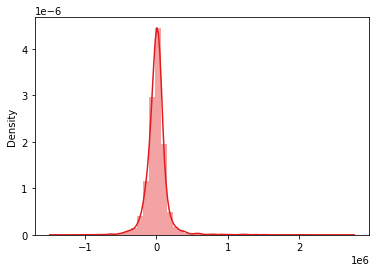

In [279]:
# checking for normal distribution of residuals

fig = sns.distplot(model3.resid)

In [268]:
# performing shapiro test to check normality of residuals

from scipy.stats import shapiro
shapiro(model3.resid)

ShapiroResult(statistic=0.785826563835144, pvalue=0.0)

#### As the p value is less than 0.05, we can say that normality of residuals assumption is violated.

In [444]:
# selecting features based on multicolinearity in model 3

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data3.drop("price",axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data3.drop("price",axis=1).values, i)
                          for i in range(len(data3.drop("price",axis=1).columns))]
  
print(vif_data.to_string())

          feature        VIF
0       zip_98002   1.479587
1       zip_98003   1.754295
2       zip_98004   1.881015
3       zip_98005   1.473004
4       zip_98006   2.363158
5       zip_98007   1.376373
6       zip_98008   1.824965
7       zip_98010   1.294622
8       zip_98011   1.511105
9       zip_98014   1.359398
10      zip_98019   1.476809
11      zip_98022   1.652445
12      zip_98023   2.528540
13      zip_98024   1.220457
14      zip_98027   2.160851
15      zip_98028   1.821618
16      zip_98029   1.839365
17      zip_98030   1.696252
18      zip_98031   1.806912
19      zip_98032   1.337488
20      zip_98033   2.193103
21      zip_98034   2.573509
22      zip_98038   2.572396
23      zip_98039   1.146838
24      zip_98040   1.828579
25      zip_98042   2.563802
26      zip_98045   1.638735
27      zip_98052   2.626831
28      zip_98053   2.197357
29      zip_98055   1.724035
30      zip_98056   2.137311
31      zip_98058   2.276921
32      zip_98059   2.389324
33      zip_98

#### There exists some multicolinearity in our data, hence we can say that the assumption of no mulitcolinearity is also violated.

In [445]:
# checking for auto correlation in residuals using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model3.resid)

1.9950023767296503

#### Since the Durbin_Watson test gave a value below 2, there is a positive auto correlation in he residuals. Hence, assumption of no auto correlation is also violated.

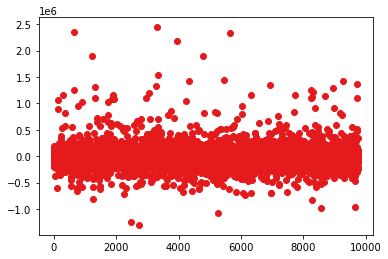

In [454]:
# checking for homoskedasticity of residuals

plt.scatter(model3.resid.index,model3.resid)

#### There is no uniform variance across residuals, hence the assumption of homoskedascity of residuals is also violated.

## All the assumptions of linear regression is violated by our Linear regression model, using this model could cause significant problems with interpretation of the model itself.

## Based on our experiments so far, we can conclude that the Decision tree model is better option when compared to linear regression model.